# Identifying Genre Trends in Spotify User's Listening Habits.


Spotify, founded in 2006, arguably launched the current era of music consumption through streaming. Audio streaming platforms are currently the dominant form of audio consumption on the planet and are a very competetive market. Since 2016, Spotify has launched an annual, free report to its listeners in the form of 'Spotify Wrapped'. Easily digestable, shareable nuggets of personalised data have acted as a powerful marketing tool for Spotify. Spotify Wrapped has straddled the distance between data analysis and the cultural zeistgeist and is now annually parroted and memed by other users and companies. With this in mind, this report is focused on asking further social questions using Spotify data to identify other marketable moments for Spotify customers. The main questions this report aims to answers are:

>1.  Do listeners create genre-specific playlists?

>2.  Are there specific genres or moods that are more popular?


This will achieved by analysing data from a spotify api of around 30, 000 songs. The data set can be found __[here](https://www.kaggle.com/datasets/joebeachcapital/30000-spotify-songs/)__.



## 1. Gathering and Opening the Data



The dataset from Kaggle was chosen as it is an open database. First steps is to open the dataset and have a look at what is in it. Then the data was downloaded, opened and cleaned. Empty fields, inconsistencies, and duplicate rows were checked to prepare the data for processing.





In [1]:
#First,adding some libraries. This will be helpful later.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#next the dataset was opened in the notebook

file_path = 'C:/Users/tchec/OneDrive/Documents/dataquest data csvs/spotify_songs.csv'
df = pd.read_csv(file_path)

#This is to show the shape of the data.

print("Shape of the dataset:", df.shape)

#Now, we take a look at the kinds of data we are working with, using the head method.

print('This is what the data looks like in table format:')
df.head(5)


Shape of the dataset: (32833, 23)
This is what the data looks like in table format:


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


####Results

It appears this dataset comprehensively covers songs, albums, artists and genre ect. It does not, however, contain any information about subscriber count. Spotify offers three tiers of service: free (with ads), paid (student/in full) and a family membership offer (up to 5 in the same household).




In [3]:
#This section of code check what kind of data is in the data set.

data_types = df.dtypes.unique()
print('types of data the the dataset:')
print(data_types)

types of data the the dataset:
[dtype('O') dtype('int64') dtype('float64')]


Based from the results, this dataset contain a mix of object type data (dtype('0'), and integer and floating point data (dtype('int64') and dtype('float64')). By looking at the table above, the data type by column can be inferred.



## 2. Preparing the Dataset for Processing

The spotify dataset was downloaded from Kaggle, an open access resource for datasets. Therefore, this data needs to be checked that it is ready for further processing because applying any statistical methods.

####Missing Data

The dataset is checked for any missing fields, duplicate records, and any statistical outliers.

In [4]:
#This is to check how many empty fields there are in the data.

missing_fields = df.isnull().sum()
print('Here are the missing fields per column:')
print(missing_fields)


Here are the missing fields per column:
track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64


There are 5 missing fields in the track_name, track_album_name, and track_artist columns. These missing values need to be isolated and explored.


In [5]:
#Here, we identify the missing values in our dataset.
#We know from the exploration above that the missing fields are related to specific columns, so we will start there.


checking_columns = ['track_name', 'track_artist', 'track_album_name']
missing_values_columns = df[df[checking_columns].isna().any(axis=1)]
print("Rows with missing values in track name, track artist and track album name columns:")
print(missing_values_columns)




Rows with missing values in track name, track artist and track album name columns:
                     track_id track_name track_artist  track_popularity  \
8151   69gRFGOWY9OMpFJgFol1u0        NaN          NaN                 0   
9282   5cjecvX0CmC9gK0Laf5EMQ        NaN          NaN                 0   
9283   5TTzhRSWQS4Yu8xTgAuq6D        NaN          NaN                 0   
19568  3VKFip3OdAvv4OfNTgFWeQ        NaN          NaN                 0   
19811  69gRFGOWY9OMpFJgFol1u0        NaN          NaN                 0   

               track_album_id track_album_name track_album_release_date  \
8151   717UG2du6utFe7CdmpuUe3              NaN               2012-01-05   
9282   3luHJEPw434tvNbme3SP8M              NaN               2017-12-01   
9283   3luHJEPw434tvNbme3SP8M              NaN               2017-12-01   
19568  717UG2du6utFe7CdmpuUe3              NaN               2012-01-05   
19811  717UG2du6utFe7CdmpuUe3              NaN               2012-01-05   

            pla

####Results

'NaN' stands for 'Not a Number' in datasets, although this appears in columns in our dataset with object type values. However, 'NaN' is also commonly referred to a missing value in a dataset, as in this case. The missing values in this dataset refers to a tiny portion of (5 rows) out of hundreds of records where the album, artist, and track name are missing. Therefore, we will delete these 5 records so that they have no statistical bias on our results.

In [8]:
#deleting these records with the drop method:


columns_with_missing_values = ['track_name', 'track_artist', 'track_album_name']
df_cleaned = df.dropna(subset = columns_with_missing_values, how='any')
print("Shape of the cleaned DataFrame:", df_cleaned.shape)
df.dropna(subset=columns_with_missing_values, how='any', inplace=True)

#then we repeated the code above just to double check that they had been deleted.

checking_columns = ['track_name', 'track_artist', 'track_album_name']
missing_values_columns = df[df[checking_columns].isna().any(axis=1)]
print("Rows with missing values in track name, track artist and track album name columns:")
print(missing_values_columns)


Shape of the cleaned DataFrame: (32828, 23)
Rows with missing values in track name, track artist and track album name columns:
Empty DataFrame
Columns: [track_id, track_name, track_artist, track_popularity, track_album_id, track_album_name, track_album_release_date, playlist_name, playlist_id, playlist_genre, playlist_subgenre, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms]
Index: []

[0 rows x 23 columns]


Final checks for duplicate records and any outliers in the data are shown below.

In [9]:
#Checking for duplicate records, rows, and columns.

#Records
duplicate_records = df[df.duplicated()]
if duplicate_records.empty:
    print("\nThere are no duplicate records.")
else:
    print("Duplicate records:")
    print(duplicate_records)

#Rows
duplicate_rows = df[df.duplicated(keep=False)]
if duplicate_rows.empty:
    print("\nThere are no duplicate rows.")
else:
    print("\nDuplicate rows:")
    print(duplicate_rows)

#Columns
duplicate_columns = df.columns[df.columns.duplicated()]
if not duplicate_columns.any():
    print("\nThere are no duplicate columns.")
else:
    print("\nDuplicate columns:")
    print(duplicate_columns)




There are no duplicate records.

There are no duplicate rows.

There are no duplicate columns.


####Results

These results indicate that the dataset has no duplicate records, rows, or columns.

###Checking for Outliers

Finally, the dataset was checked for statistical outliers, inconsistencies and unexpectedly values. For statiscal outliers, the duration of the tracks was chosen because it was a interger value, and would also demostrate a bell curve to the data.

####Bell Curve of Song Duration in the Data.

In [10]:
#looking for inconsistancies in values.


inconsistent_columns = df.select_dtypes(include=['object']).columns

for column in inconsistent_columns:
    unique_values = df[column].unique()[:5]  # Only take the first 5 unique values
    print(f'Here are the unique values in {column} (first 5): {unique_values}')

Here are the unique values in track_id (first 5): ['6f807x0ima9a1j3VPbc7VN' '0r7CVbZTWZgbTCYdfa2P31'
 '1z1Hg7Vb0AhHDiEmnDE79l' '75FpbthrwQmzHlBJLuGdC7'
 '1e8PAfcKUYoKkxPhrHqw4x']
Here are the unique values in track_name (first 5): ["I Don't Care (with Justin Bieber) - Loud Luxury Remix"
 'Memories - Dillon Francis Remix' 'All the Time - Don Diablo Remix'
 'Call You Mine - Keanu Silva Remix'
 'Someone You Loved - Future Humans Remix']
Here are the unique values in track_artist (first 5): ['Ed Sheeran' 'Maroon 5' 'Zara Larsson' 'The Chainsmokers' 'Lewis Capaldi']
Here are the unique values in track_album_id (first 5): ['2oCs0DGTsRO98Gh5ZSl2Cx' '63rPSO264uRjW1X5E6cWv6'
 '1HoSmj2eLcsrR0vE9gThr4' '1nqYsOef1yKKuGOVchbsk6'
 '7m7vv9wlQ4i0LFuJiE2zsQ']
Here are the unique values in track_album_name (first 5): ["I Don't Care (with Justin Bieber) [Loud Luxury Remix]"
 'Memories (Dillon Francis Remix)' 'All the Time (Don Diablo Remix)'
 'Call You Mine - The Remixes' 'Someone You Loved (Future Human

In [12]:
#Searching for unexpected values.

unexpected_values = df.describe()
print('Unexpected values (First 5 records):')
print(unexpected_values.head(5))

Unexpected values (First 5 records):
       track_popularity  danceability        energy           key  \
count      32828.000000  32828.000000  32828.000000  32828.000000   
mean          42.483551      0.654850      0.698603      5.373949   
std           24.980476      0.145092      0.180916      3.611572   
min            0.000000      0.000000      0.000175      0.000000   
25%           24.000000      0.563000      0.581000      2.000000   

           loudness          mode   speechiness  acousticness  \
count  32828.000000  32828.000000  32828.000000  32828.000000   
mean      -6.719529      0.565737      0.107053      0.175352   
std        2.988641      0.495667      0.101307      0.219644   
min      -46.448000      0.000000      0.000000      0.000000   
25%       -8.171250      0.000000      0.041000      0.015100   

       instrumentalness      liveness       valence         tempo  \
count      32828.000000  32828.000000  32828.000000  32828.000000   
mean           0.08

First 5 Unique Values in Danceability: [0.748 0.726 0.675 0.718 0.65 ]



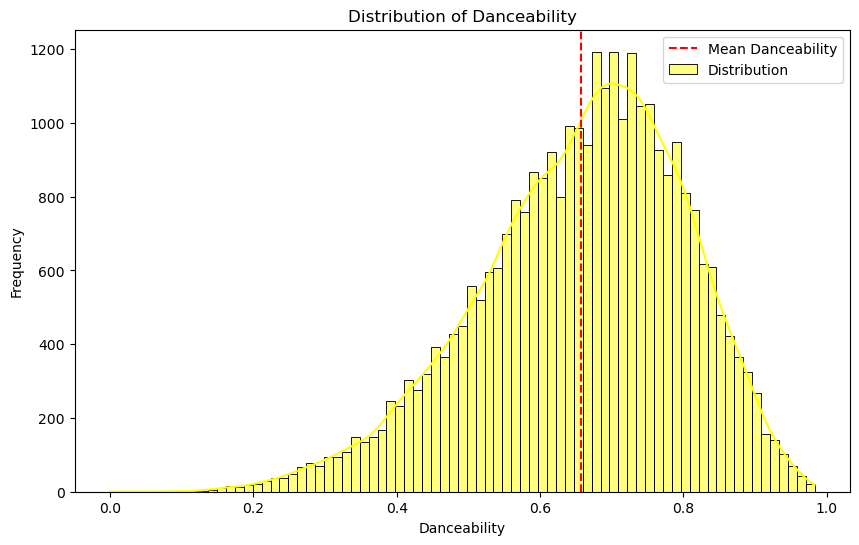

In [138]:
#demonstrating these unique values in danceability with a graph

# Check for unexpected values in the "danceability" column

unexpected_danceability_values = df['danceability'].unique()[:5]
print(f'First 5 Unique Values in Danceability: {unexpected_danceability_values}\n')


#adding the mean

mean_danceability = df['danceability'].mean()

#Visualisation

plt.figure(figsize=(10, 6))
sns.histplot(df['danceability'], kde=True, color='yellow', label='Distribution')
plt.axvline(x=mean_danceability, color='red', linestyle='--', label='Mean Danceability')
plt.title('Distribution of Danceability')
plt.xlabel('Danceability')
plt.ylabel('Frequency')
plt.legend()
plt.show()

####Results

The above explorations in inconsistent values indicate that there are a great deal of unique values in the naming of tracks, albums, and playlists. Further analysis of unexpected values suggest that the majority of the numeric data can be visualised as a bell curve, which is the normal distribuiton for these kinds of data. The mean danceability score of the data is around 0.64.

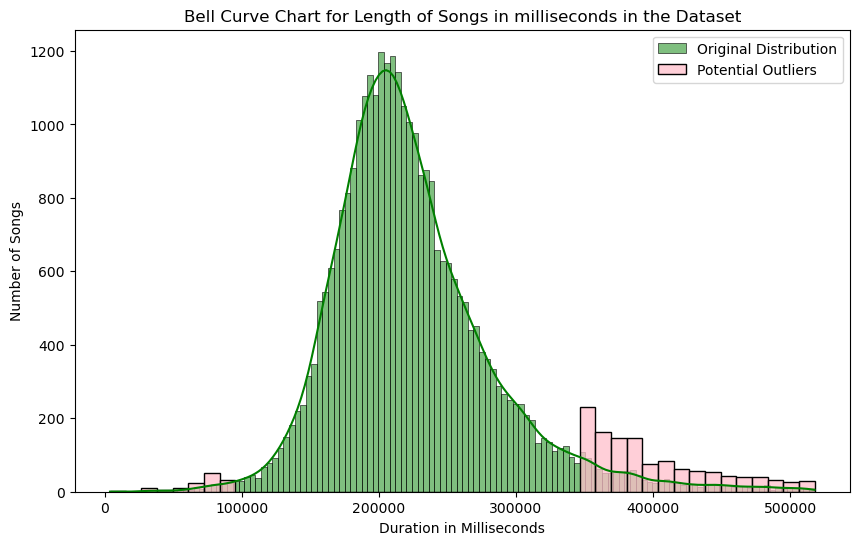

In [135]:
#checking for statistical outliers

duration_ms = 'duration_ms'
Q1 = df[duration_ms].quantile(0.25)
Q3 = df[duration_ms].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#outliers

outliers = df[(df[duration_ms] < lower_bound) | (df[duration_ms] > upper_bound)]

#demonstrating a bell curve

sns.set_palette("pastel")

plt.figure(figsize=(10, 6))
sns.histplot(df[duration_ms], kde=True, color='green', label='Original Distribution')
sns.histplot(outliers[duration_ms], color='pink', label='Potential Outliers')
plt.title(f'Bell Curve Chart for Length of Songs in milliseconds in the Dataset')
plt.xlabel('Duration in Milliseconds')
plt.ylabel('Number of Songs')
plt.legend()
plt.show()




####Results

The above bell curve graph indicates that there is a good spread of data available about the duration in milliseconds of songs in this Spotify dataset. This is a good kicking off point for further explorations.

## 3. Data Exploration and Analysis.

This section will explore the Spotify data set. It will look at the mean, mode, and median of certain columns. This will shape the kinds of socials questions analysing this data could answer. This will drive suggestions to improve consumer experience in Spotify.




###Track Popularity

The below graphs visulises the popularity of tracks by genre and that there are a lot of tracks that are not popular (score 0). The mean popularity is 42.76. It further suggests that 'medium' level popular tracks are streamed the most, specifically in playlist that are 'rap' or 'edm'. This suggests that most consumers are making playlists with songs that will appeal to a largest range of people possible (because if a track is 'highly' popular, it might be considered 'too' popular to place into a playlist).

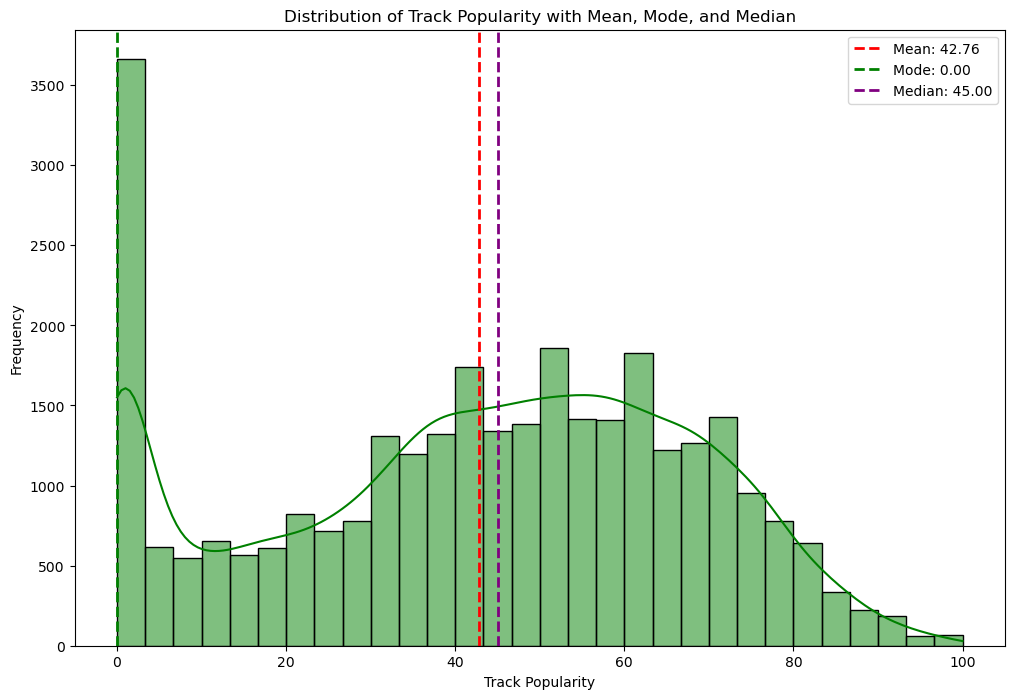

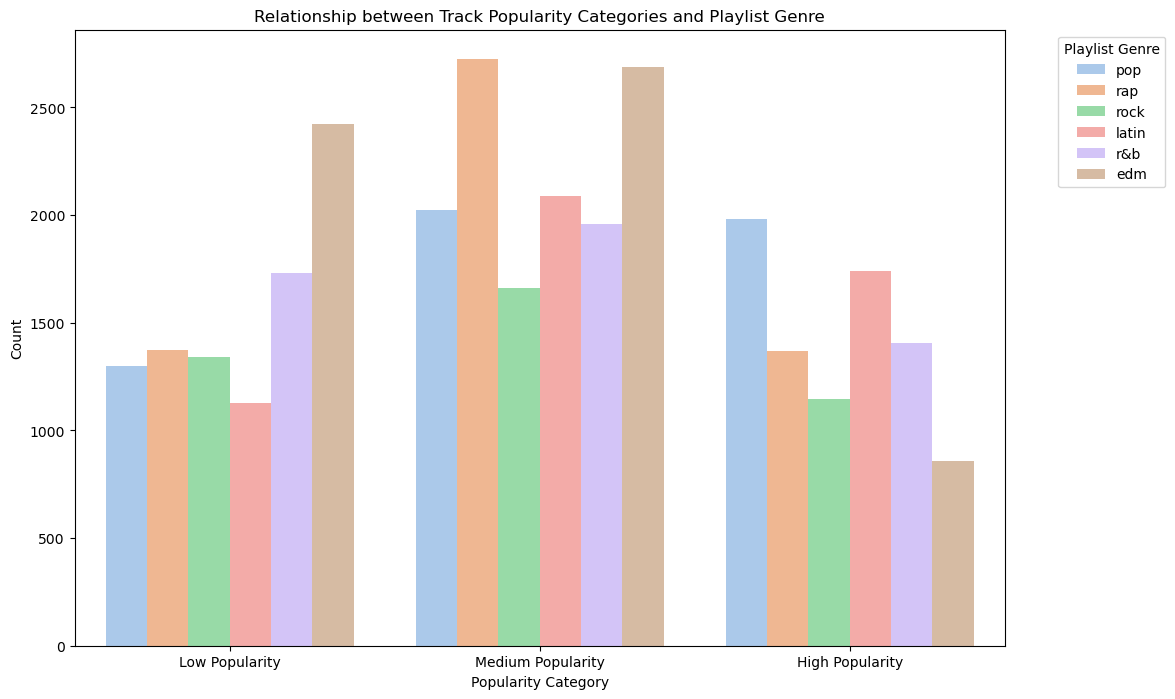

In [108]:
#Exploring what tracks are popular
#higher track popularity = more streams

sns.set_palette("pastel")

# Calculating mean, mode, and median of track_popularity

mean_popularity = df_copy['track_popularity'].mean()
mode_popularity = df_copy['track_popularity'].mode().iloc[0]
median_popularity = df_copy['track_popularity'].median()

# Visualisation

plt.figure(figsize=(12, 8))
sns.histplot(df_copy['track_popularity'], kde=True, color='green', bins=30)
plt.axvline(mean_popularity, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_popularity:.2f}')
plt.axvline(mode_popularity, color='green', linestyle='dashed', linewidth=2, label=f'Mode: {mode_popularity:.2f}')
plt.axvline(median_popularity, color='purple', linestyle='dashed', linewidth=2, label=f'Median: {median_popularity:.2f}')
plt.title("Distribution of Track Popularity with Mean, Mode, and Median")
plt.xlabel("Track Popularity")
plt.ylabel("Frequency")
plt.legend()
plt.show()


#making bins
bins = [0, 30, 60, 100]  
labels = ['Low Popularity', 'Medium Popularity', 'High Popularity']

#new column
df_copy['popularity_category'] = pd.cut(df_copy['track_popularity'], bins=bins, labels=labels, include_lowest=True)

sns.set_palette("pastel")

#Visualisation

plt.figure(figsize=(12, 8))
sns.countplot(x='popularity_category', hue='playlist_genre', data=df_copy)
plt.title("Relationship between Track Popularity Categories and Playlist Genre")
plt.xlabel("Popularity Category")
plt.ylabel("Count")
plt.legend(title="Playlist Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



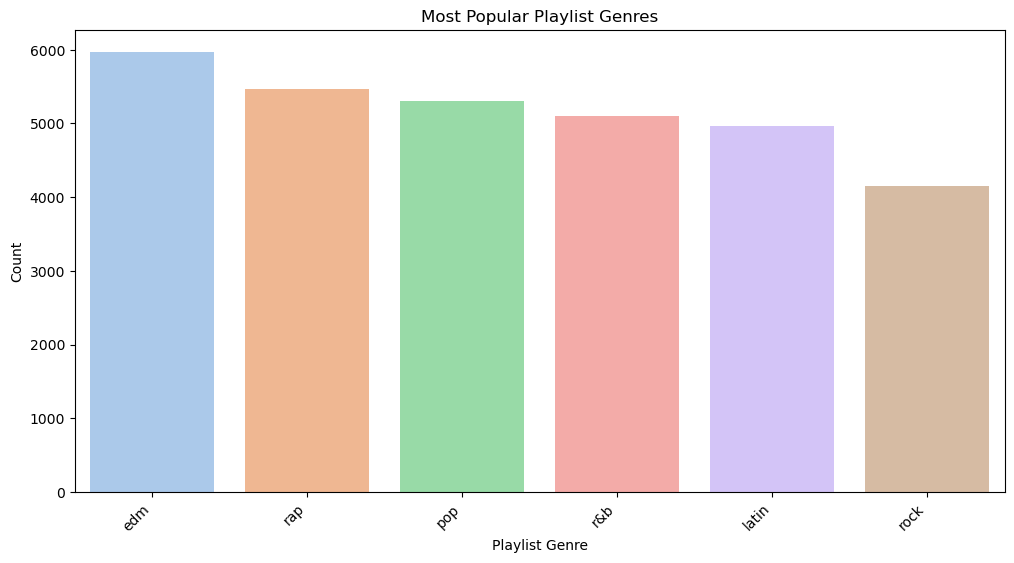

In [109]:
#most popular genres

most_popular_genres = df['playlist_genre'].value_counts()

#bar chart

plt.figure(figsize=(12, 6))
sns.barplot(x=most_popular_genres.index, y=most_popular_genres, palette='pastel')
plt.title('Most Popular Playlist Genres')
plt.xlabel('Playlist Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') 
plt.show()

As the above graph demonstrates, the most popular genre of playlist from this dataset is the 'edm' genre. This suggests that perhaps, track popularity and Danceability are correlated which the below graph demonstrates a strong cluster point around the median:

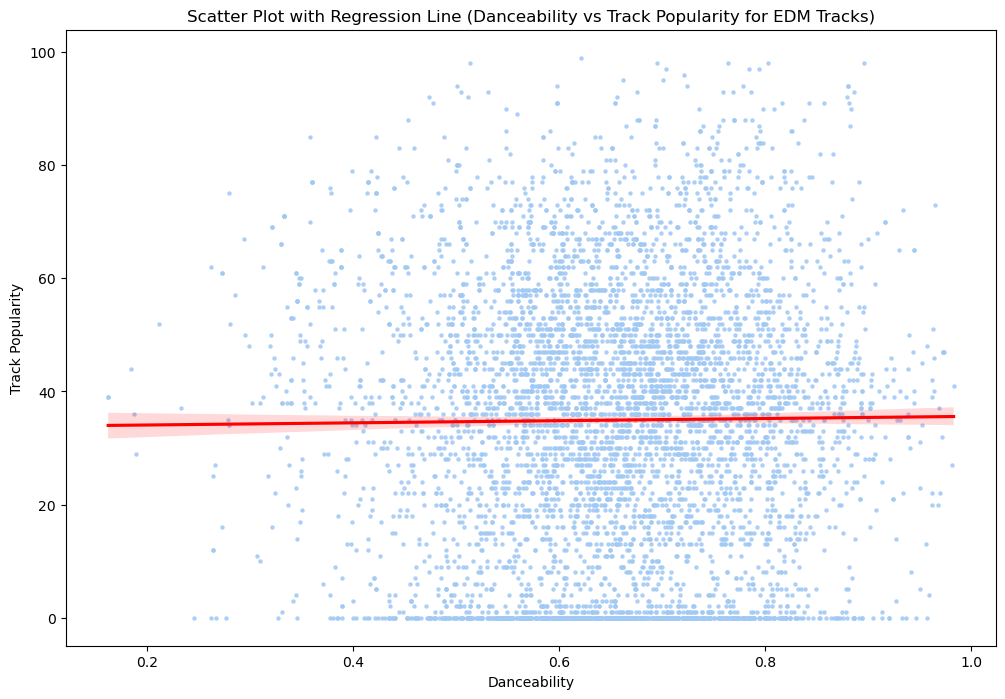

In [114]:
#relationship between danceability, track popularity and EDM

edm_tracks = df_copy[df_copy['playlist_genre'] == 'edm']


sns.set_palette("pastel")

#scatter

plt.figure(figsize=(12, 8))
sns.regplot(x='danceability', y='track_popularity', data=edm_tracks, scatter_kws={'s': 5}, line_kws={'color': 'red'})
plt.title("Scatter Plot with Regression Line (Danceability vs Track Popularity for EDM Tracks)")
plt.xlabel("Danceability")
plt.ylabel("Track Popularity")
plt.show()




However, this is not the case for length of song:



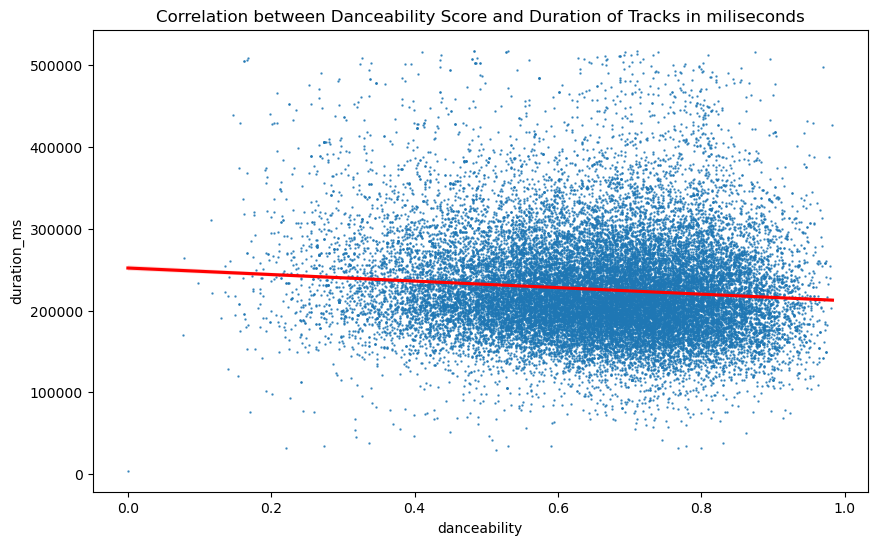

In [50]:

#scatter

columns_to_correlate = ['danceability', 'duration_ms']


plt.figure(figsize=(10, 6))
sns.regplot(x=columns_to_correlate[0], y=columns_to_correlate[1], data=df, scatter_kws={'s': 0.5}, line_kws={'color': 'red'})
plt.title(f'Correlation between Danceability Score and Duration of Tracks in miliseconds')
plt.xlabel(columns_to_correlate[0])
plt.ylabel(columns_to_correlate[1])
plt.show()


they do however, seem to be loud:

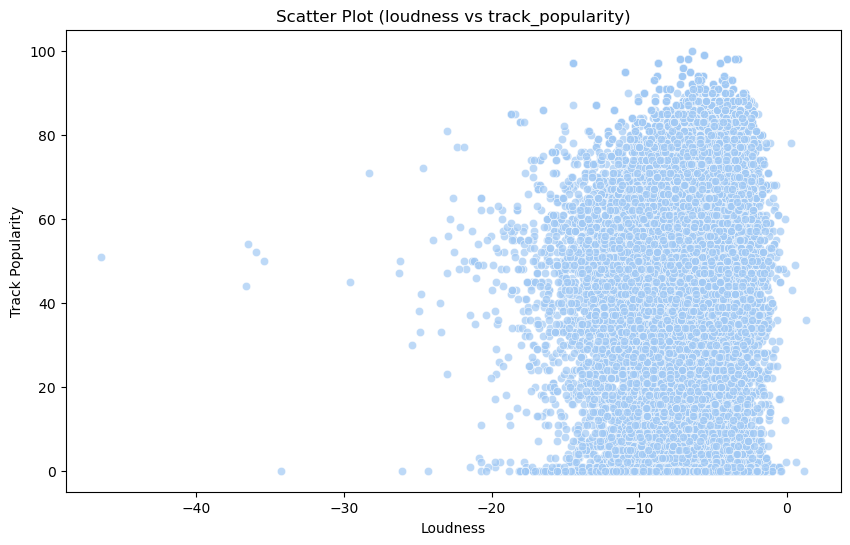

In [120]:
#scatter

x_column = 'loudness'
y_column = 'track_popularity'



plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_column, y=y_column, data=df, alpha=0.7)
plt.title(f'Scatter Plot ({x_column} vs {y_column})')
plt.xlabel('Loudness')
plt.ylabel('Track Popularity')
plt.show()

and there is a correlation between danceability and loudness:

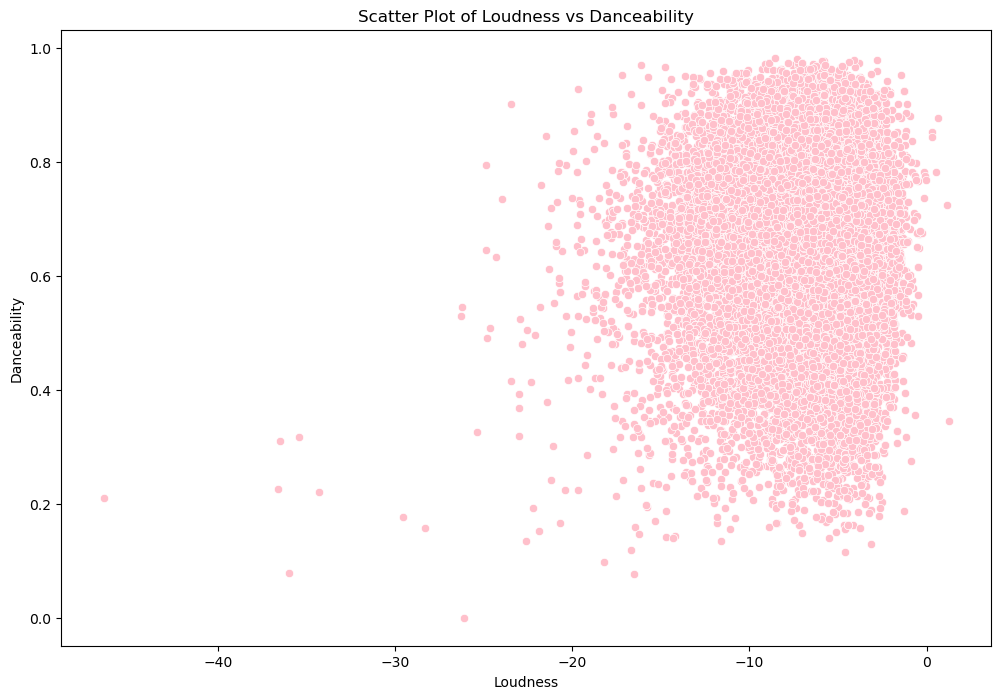

In [136]:
sns.set_palette("pastel")

#visulisation

plt.figure(figsize=(12, 8))
sns.scatterplot(x='loudness', y='danceability', data=df_copy, color='pink')
plt.title("Scatter Plot of Loudness vs Danceability")
plt.xlabel("Loudness")
plt.ylabel("Danceability")
plt.show()



And tempo versus danceability:

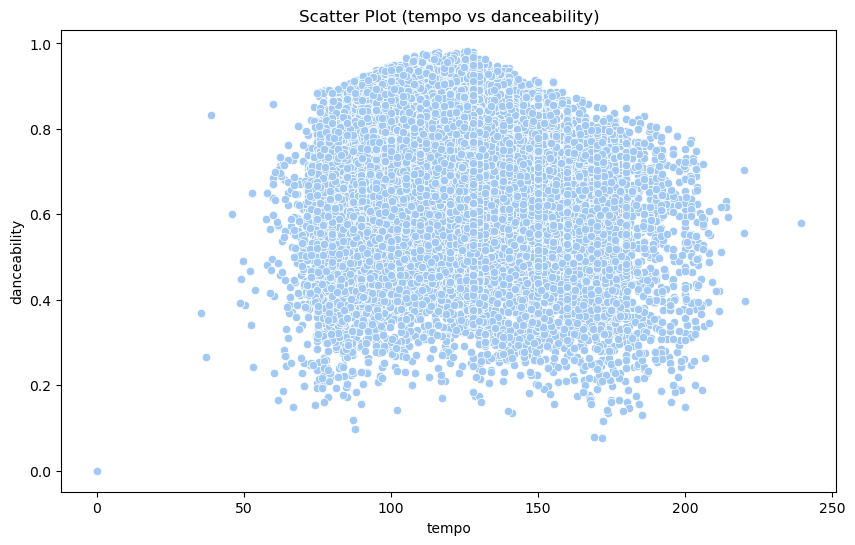

In [141]:

#scatter tempo vs danceability

x_column = 'tempo'
y_column = 'danceability'

plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_column, y=y_column, data=df, alpha=1)
plt.title(f'Scatter Plot ({x_column} vs {y_column})')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.show()

When looking at the distribution of genre per playlists, EDM is the most popular genre:

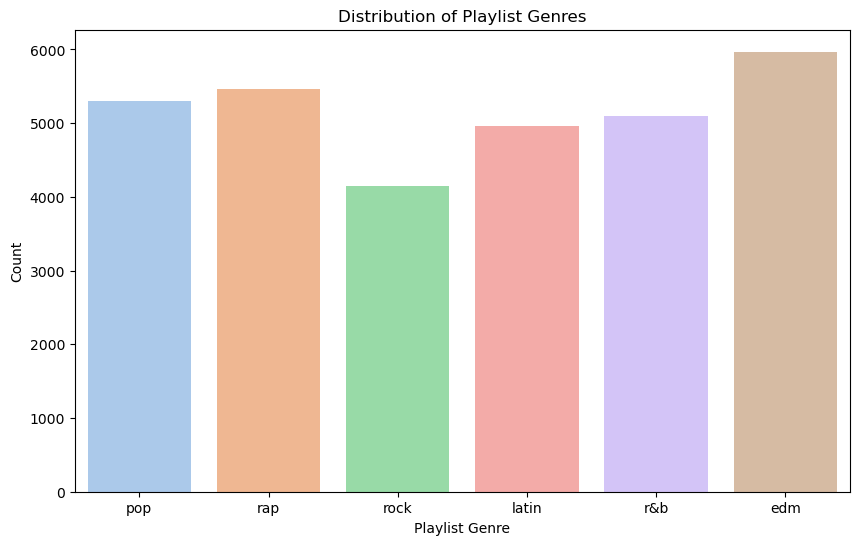

In [142]:
#bar chart of distribution

plt.figure(figsize=(10, 6))
sns.countplot(x='playlist_genre', data=df_copy, palette='pastel')
plt.title("Distribution of Playlist Genres")
plt.xlabel("Playlist Genre")
plt.ylabel("Count")
plt.show()

A quick look at the mode suggest a similar picture:

In [124]:
#looking at the mode of names

#track_name

mode_track_name = df_copy['track_name'].mode().iloc[0]

#track_artist

mode_track_artist = df_copy['track_artist'].mode().iloc[0]

#playlist_name

mode_playlist_name = df_copy['playlist_name'].mode().iloc[0]


print("Mode of track_name:", mode_track_name)
print("Mode of track_artist:", mode_track_artist)
print("Mode of playlist_name:", mode_playlist_name)



Mode of track_name: Forever
Mode of track_artist: Martin Garrix
Mode of playlist_name: Indie Poptimism


Further drilling into playlists:

In [130]:

#relationship between the most popular genre and playlist

indie_poptimism_tracks = df_copy[df_copy['playlist_name'] == 'Indie Poptimism']
edm_tracks_count = indie_poptimism_tracks[indie_poptimism_tracks['playlist_genre'] == 'edm'].shape[0]

print(f"Number of EDM tracks in the playlist 'Indie Poptimism': {edm_tracks_count}")


#looking for the most popular genre in indie poptimism

indie_poptimism_tracks = df_copy[df_copy['playlist_name'] == 'Indie Poptimism']
mode_genre_in_playlist = indie_poptimism_tracks['playlist_genre'].mode().iloc[0]

print(f"Mode genre in the playlist 'Indie Poptimism': {mode_genre_in_playlist}")


#looking for the most popular playlist in the dataset

playlist_track_counts = df_copy['playlist_name'].value_counts()
most_tracks_playlist = playlist_track_counts.idxmax()
most_tracks_count = playlist_track_counts.max()

print(f"The playlist with the most tracks is '{most_tracks_playlist}' with {most_tracks_count} tracks.")



Number of EDM tracks in the playlist 'Indie Poptimism': 0
Mode genre in the playlist 'Indie Poptimism': pop
The playlist with the most tracks is 'Indie Poptimism' with 299 tracks.


####Results

The above analysis has explored:

>1. Different ways to ascertain the most 'popular' track, based on specfic criteria such as genre, danceability and modes of track names.
>2. How genre varies between popular playlists. Although the most playlists are 'pop', this might be because the playlist with the most tracks has the most 'pop' tracks. Overall, it seems that 'EDM' playlists are the most popular.
>3. Most playlists seems to be in the sweet spot of loud, danceable and a tempo of around 100-150.


##4. Conclusion and Suggestions for Further Analysis.

This report set out to answer the following questions:

>1.  Do listeners create genre-specific playlists?

>2.  Are there specific genres or moods that are more popular?

Although they are broad, the intention was to visulise in data what consumers preferances might be, and how Spotify might be able to adjust their offering to provide an even more listenable, easy service.

Once caveat to consider is that Spotify's offering also includes podcasts and audiobooks, which this api dataset does not cover. Notwithstanding, the findings from this analysis is that:

>1. EDM is popular amongst Spotify users who make and consume playlists
>2. Loud, danceable music is more likely to be made into a playlist.
>3. Despite the popularity of EDM, there is a fairly even spread of genres amongst playlists.

Based on these observations, the suggestions to Spotify would be:

>1. Suggest songs to add to consumer's playlists that score highly on the 'danceability' score, but around 42.76 in 'track popularity'
>2. Increase shareability of playlists between users.
>3. Consider increasing suggestion between sub-grenre categories.

Further analysis in subscription use, drop out rate and non-musical listening on Spotify would ascertain precisely how to encourage more subscribers.
